# Netflix Data Analysis

In [483]:
#ALL IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [484]:
#READ DATA FROM FILE
nf = pd.read_csv('netflix_titles.csv')

In [485]:
#REVIEW DATA
nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [486]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [487]:
print("There are {} rows and {} columns in the dataset.".format(nf.shape[0],nf.shape[1]))

There are 6234 rows and 12 columns in the dataset.


### 

## Data Preprocessing

### Data Types

#### Type

In [488]:
nf['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

#### Year Released/Added

In [489]:
#Create new columns with year added
nf['date_added'] = pd.to_datetime(nf['date_added'])

nf['year_added'] = nf['date_added'].dt.year

In [490]:
#Change release_year to numeric data
nf['year_release'] = nf['release_year'].dropna().apply(lambda x : int(x))

In [491]:
#Drop 'date_added' and 'release_year' because we got altervatives
nf.drop(['date_added','release_year'], axis=1, inplace=True)

#### Rating

In [492]:
nf['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [493]:
#Drop 'rating' column because would like to get some numbers instead of  string rating
# nf = nf.drop('rating', axis=1)

#### Duration

In [494]:
def count(duration):
    x = 0
    if 'min' in duration:
        x += 1
    return x

In [495]:
sp = nf['duration'].dropna().apply(lambda x: count(x))

In [496]:
sp.value_counts()

1    4265
0    1969
Name: duration, dtype: int64

In [497]:
#Return only number of seasons or 'min':0
nf['Season'] = nf['duration'].apply(lambda x: x[:2] if 'Season' in x else 0)

In [498]:
#Return only number of minutes or 'season':0
nf['duration'] = nf['duration'].apply(lambda x: x[:-4] if 'min' in x else 0)

In [499]:
nf['duration'] = pd.to_numeric(nf['duration'])
nf['duration'].value_counts()

0      1969
90      111
91      104
92      101
95       94
       ... 
228       1
224       1
200       1
196       1
205       1
Name: duration, Length: 187, dtype: int64

In [500]:
nf['Season'] = pd.to_numeric(nf['Season'])
nf['Season'].value_counts()

0     4265
1     1321
2      304
3      158
4       61
5       46
6       22
7       21
8       16
9        7
11       3
10       3
15       2
13       2
12       2
14       1
Name: Season, dtype: int64

## Missing data

In [501]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
rating            10
duration           0
listed_in          0
description        0
year_added        11
year_release       0
Season             0
dtype: int64

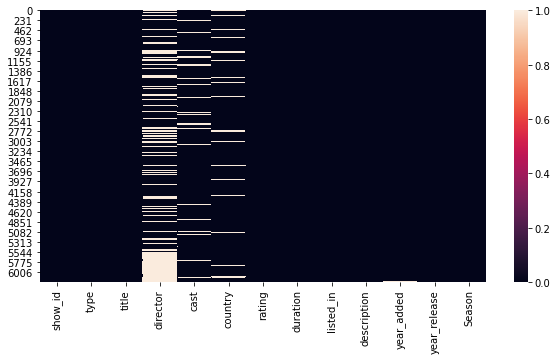

In [502]:
plt.figure(figsize=(10,5))
sns.heatmap(nf.isnull())
plt.show()

##### * Large amount of director and cast are missing
##### * Country has some data missing
##### * Small portion of year-added is missing

#### *** How many percentage of NaN input in total inputs of each columns?

In [504]:
nf.isnull().sum()/len(nf)*100
#1. Drop director, cast, because of large amount missing input that is not needed for data analysis
#2. Drop description because of the complex content to analyze
#3. Might need director and cast for recommender system
#4. Keep country to analyze

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
year_added       0.176452
year_release     0.000000
Season           0.000000
dtype: float64

In [505]:
nf.drop(['director', 'cast'], axis=1, inplace=True)
nf.drop('description', axis=1, inplace=True)

In [506]:
# Filling all the missing values in the 'country' column with United States 
#as Netflix was created in the USA and every show is aired on Netflix US.
nf['country'].replace(np.nan, 'United States', inplace=True)

In [507]:
# Dropna to drop all other missing data as it conly accounts for 0.1% of the dataset
nf.dropna(inplace=True)

In [508]:
nf.isnull().sum()/len(nf)*100

show_id         0.0
type            0.0
title           0.0
country         0.0
rating          0.0
duration        0.0
listed_in       0.0
year_added      0.0
year_release    0.0
Season          0.0
dtype: float64

### 

## Exploratory Data Analysis

#### Questions to answer:
1. Understanding what content is available in different countries (using type & country)
2. Is Netflix has increasingly focusing on TV rather than movies in recent years? (using type and year_added)
3. Is there more movies for adults than for kids? (using type, rating)
4. Is there correlation between audience groups and length of duration? (using rating, duration, and season)


In [509]:
nf.head()

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,Season
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",TV-PG,90,"Children & Family Movies, Comedies",2019.0,2019,0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,TV-MA,94,Stand-Up Comedy,2016.0,2016,0
2,70234439,TV Show,Transformers Prime,United States,TV-Y7-FV,0,Kids' TV,2018.0,2013,1
3,80058654,TV Show,Transformers: Robots in Disguise,United States,TV-Y7,0,Kids' TV,2018.0,2016,1
4,80125979,Movie,#realityhigh,United States,TV-14,99,Comedies,2017.0,2017,0


#### 1. Contents in different countries

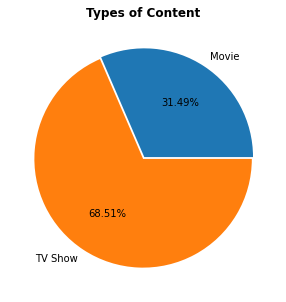

In [510]:
# Consider 2 types:
plt.figure(figsize=(10,5))
plt.pie(x=nf['type'].value_counts().sort_values(), labels=nf['type'].value_counts().index, 
        explode=[0.02,0], autopct = '%1.2f%%')
plt.title('Types of Content', fontsize=12, fontweight='bold')
plt.show()
# About 1/3 is movie and 2/3 is TV Show

In [511]:
#COUNTRY
nf['country'].value_counts()

United States                                    2494
India                                             777
United Kingdom                                    347
Japan                                             174
Canada                                            141
                                                 ... 
Finland, Germany, Belgium                           1
United Kingdom, Spain, United States, Germany       1
Russia, United States                               1
South Korea, Canada, United States, China           1
Chile, Spain, Argentina, Germany                    1
Name: country, Length: 554, dtype: int64

In [512]:
from collections import Counter
country_data = nf['country']

#Split the input as list of many countries
country = ','.join(country_data).replace(' ,',',').replace(', ',',').split(',')

count = Counter(country)
#count
country_count = pd.Series(dict(count)).sort_values(ascending=False)

In [513]:
#TOP 10 Countries
top10_country = country_count.head(10)
top10_country
# nf['country'].values

United States     3072
India              838
United Kingdom     601
Canada             318
France             271
Japan              229
Spain              178
South Korea        162
Germany            151
Mexico             129
dtype: int64

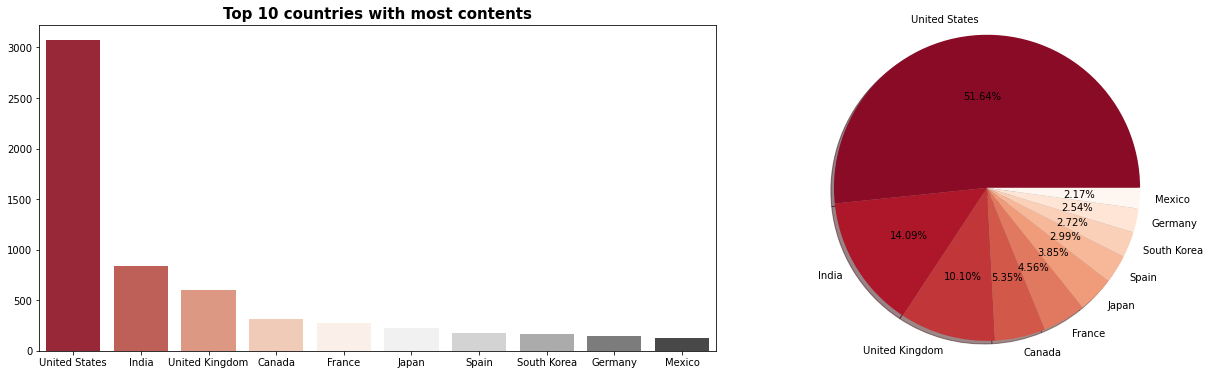

In [514]:
x = top10_country.index
y = top10_country

from matplotlib import gridspec
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

axes1 = plt.subplot(gs[0])
sns.barplot(x=x, y=y, ax=axes1, palette="RdGy")
axes1.set_xticklabels(x)
axes1.set_title('Top 10 countries with most contents', fontsize=15, fontweight='bold')

axes2 = plt.subplot(gs[1])
axes2.pie(y, labels=x, shadow=True, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.2f%%')
axes2.axis('equal') 

plt.show()

##### * US accounts for more than 50% in top 10
##### * US, India, and UK contribute about 75% in top 10

#### *** How about each type of contents in top 10 countries?
##### (ignore the combination of many countries)

In [515]:
top_10=nf[(nf['country']=='United States')|(nf['country']=='India')|(nf['country']=='United Kingdom')|
          (nf['country']=='Japan')|(nf['country']=='Canada')|(nf['country']=='Spain')|(nf['country']=='France')|
          (nf['country']=='South Korea')|(nf['country']=='Germany')|(nf['country']=='Mexico')]
top_10.head()

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,Season
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,TV-MA,94,Stand-Up Comedy,2016.0,2016,0
2,70234439,TV Show,Transformers Prime,United States,TV-Y7-FV,0,Kids' TV,2018.0,2013,1
3,80058654,TV Show,Transformers: Robots in Disguise,United States,TV-Y7,0,Kids' TV,2018.0,2016,1
4,80125979,Movie,#realityhigh,United States,TV-14,99,Comedies,2017.0,2017,0
5,80163890,TV Show,Apaches,Spain,TV-MA,0,"Crime TV Shows, International TV Shows, Spanis...",2017.0,2016,1


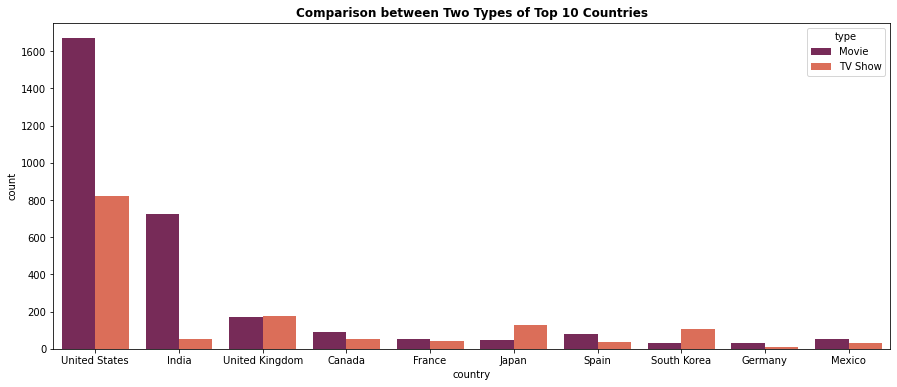

In [516]:
plt.figure(figsize=(15,6))
sns.countplot(x='country',hue='type',data=top_10, order=top10_country.index, palette="rocket")
plt.title('Comparison between Two Types of Top 10 Countries',fontweight='bold')
plt.show()

##### * Number of movies is 2 times number of TV shows in US, Canada, Spain, Germany, and Mexico
##### * About 8 times number of TV shows in India
##### * Approximately the same in UK and France
##### * It reverses in Japan and South Korea: Number of movies is about 1/3 number of TV shows
##### * Need to consider the lists of many countries


### 

#### 2. Content Added in Recent Year?

In [517]:
nf_tv =  nf[nf['type']=='TV Show']
nf_movie =  nf[nf['type']=='Movie']
nf_movie.head()

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,Season
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",TV-PG,90,"Children & Family Movies, Comedies",2019.0,2019,0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,TV-MA,94,Stand-Up Comedy,2016.0,2016,0
4,80125979,Movie,#realityhigh,United States,TV-14,99,Comedies,2017.0,2017,0
6,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",R,110,"International Movies, Sci-Fi & Fantasy, Thrillers",2017.0,2014,0
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,Chile,TV-MA,60,Stand-Up Comedy,2017.0,2017,0


In [518]:
nf['year_added'].value_counts()

2019.0    2349
2018.0    1781
2017.0    1297
2016.0     453
2020.0     184
2015.0      88
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

In [519]:
nf_content = nf['year_added'].value_counts().reset_index().rename(columns={'index':'year_added', 'year_added':'count'})

In [520]:
nf_content = nf_content.sort_values('year_added')
nf_content['percent'] = nf_content['count'].apply(lambda x : 100*x/sum(nf_content['count']))
nf_content

,year_added,count,percent
11,2008.0,2,0.032185
10,2009.0,2,0.032185
12,2010.0,1,0.016093
7,2011.0,13,0.209205
9,2012.0,7,0.112649
8,2013.0,12,0.193112
6,2014.0,25,0.402317
5,2015.0,88,1.416157
3,2016.0,453,7.289990
2,2017.0,1297,20.872224


##### Do the same for nf_tv and nf_movie

In [521]:
movie = nf_movie['year_added'].value_counts().reset_index().rename(columns = { 'index' : 'year_added',
                                                    'year_added' : 'count', }).sort_values('year_added')
movie['percent'] = movie['count'].apply(lambda x : 100*x/sum(movie['count']))
movie

,year_added,count,percent
12,2008.0,1,0.023491
10,2009.0,2,0.046981
11,2010.0,1,0.023491
7,2011.0,13,0.305379
9,2012.0,4,0.093963
8,2013.0,6,0.140944
6,2014.0,19,0.446324
5,2015.0,56,1.315480
3,2016.0,262,6.154569
2,2017.0,910,21.376556


In [522]:
tv = nf_tv['year_added'].value_counts().reset_index().rename(columns={'index':'year_added', 
                                        'year_added':'count'}).sort_values('year_added')
tv['percent'] = tv['count'].apply(lambda x: 100*x/sum(tv['count']))
tv

,year_added,count,percent
9,2008.0,1,0.051099
8,2012.0,3,0.153296
7,2013.0,6,0.306592
6,2014.0,6,0.306592
5,2015.0,32,1.635156
3,2016.0,191,9.759836
2,2017.0,387,19.775166
1,2018.0,491,25.089423
0,2019.0,803,41.032192
4,2020.0,37,1.890649


In [523]:
import plotly.graph_objects as go

t1 = go.Scatter(x=movie['year_added'], y=movie["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=tv['year_added'], y=tv["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=nf_content['year_added'], y=nf_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

##### * The growth in content started from 2013
##### * The growth in number of movies is much higher than that of TV shows on Netflix --> Netflix is focusing on Movies
##### * More than 1200 new movies were added in both 2018 and 2019
##### * The data is collected as of 2019, so 2020's data is misled in this case. 


#### *** Take a look at year_release contents after 2000

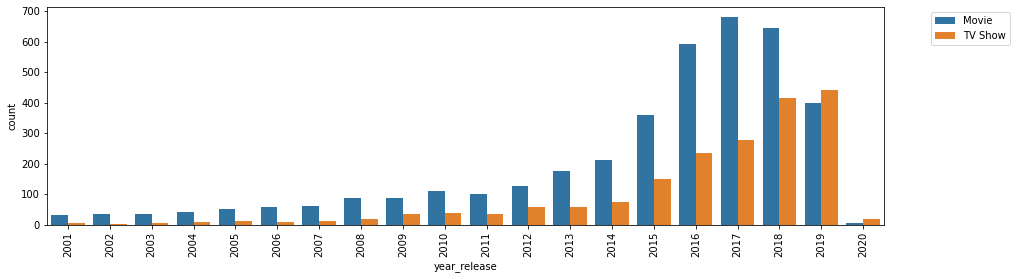

In [524]:
plt.figure(figsize=(15,4))
sns.countplot(x='year_release', hue='type', data=nf[nf['year_release']>2000])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

##### * The highest increase in producing movies is in 2017, and in 2019 for TV shows
##### * The data is collected as of 2019, so 2020's data is misled in this case.

### 

#### 3. Audience Groups and Contents

In [532]:
# Understanding Netflix rating based on ages
ages = {'TV-PG': 'Kids',
        'TV-MA': 'Adults',
        'TV-Y7-FV': 'Kids',
        'TV-Y7': 'Kids',
        'TV-14': 'Teens',
        'R': 'Adults',
        'TV-Y': 'Kids',
        'NR': 'Adults',
        'PG-13': 'Teens',
        'TV-G': 'Kids',
        'PG': 'Kids',
        'G': 'Kids',
        'UR': 'Adults',
        'NC-17': 'Adults'
}

In [533]:
nf['ages'] = nf['rating'].replace(ages)
nf['ages']

0         Kids
1       Adults
2         Kids
3         Kids
4        Teens
         ...  
6218      Kids
6219      Kids
6220      Kids
6221     Teens
6222    Adults
Name: ages, Length: 6214, dtype: object

In [534]:
# Group nf['rating'] and ['ages'], count number of show_id(s) in them
rating_nf = nf.groupby(['rating', 'ages']).agg({'show_id': 'count'}).reset_index()

# Change column's name
rating_nf.columns = ['rating', 'ages', 'counts']

# Group data by ages
rating_nf = rating_nf.sort_values('ages')
rating_nf

,rating,ages,counts
1,NC-17,Adults,2
2,NR,Adults,217
5,R,Adults,508
8,TV-MA,Adults,2025
13,UR,Adults,7
0,G,Kids,37
3,PG,Kids,184
7,TV-G,Kids,149
9,TV-PG,Kids,699
10,TV-Y,Kids,142


In [535]:
group_ages = ["G", "TV-G", "TV-Y", "PG", "TV-PG", "TV-Y7", "TV-Y7-FV",
              "PG-13", "TV-14", 'NC-17', "NR", "R", "TV-MA", "UR"]

Text(0.5, 1.0, 'Distribution of Ratings')

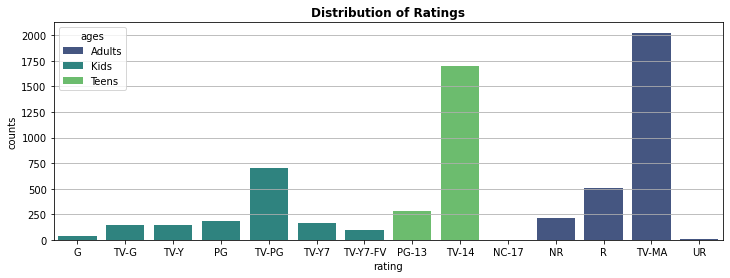

In [536]:
plt.figure(figsize=(12,4))
plt.grid('whitegrid')
sns.barplot(x='rating', y='counts', data=rating_nf, hue='ages', order=group_ages, palette="viridis", dodge=False)
plt.title("Distribution of Ratings", fontweight='bold')

##### * Most of shows are for teens and adults, small portions are for kids.
#### *** How about each type of contents?

In [542]:
nf_tv =  nf[nf['type']=='TV Show']
nf_movie =  nf[nf['type']=='Movie']
nf_movie.head()

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,Season,ages
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",TV-PG,90,"Children & Family Movies, Comedies",2019.0,2019,0,Kids
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,TV-MA,94,Stand-Up Comedy,2016.0,2016,0,Adults
4,80125979,Movie,#realityhigh,United States,TV-14,99,Comedies,2017.0,2017,0,Teens
6,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",R,110,"International Movies, Sci-Fi & Fantasy, Thrillers",2017.0,2014,0,Adults
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,Chile,TV-MA,60,Stand-Up Comedy,2017.0,2017,0,Adults


In [543]:
movie_rating = nf_movie.groupby(['ages']).agg({'show_id': 'count'}).reset_index()
movie_rating.columns = ['ages', 'count']
movie_rating = movie_rating.sort_values('ages')
movie_rating

,ages,count
0,Adults,2065
1,Kids,868
2,Teens,1324


In [544]:
tv_rating = nf_tv.groupby(['ages']).agg({'show_id': 'count'}).reset_index()
tv_rating.columns = ['ages', 'count']
tv_rating = tv_rating.sort_values('ages')
tv_rating

,ages,count
0,Adults,694
1,Kids,606
2,Teens,657


Text(0.5, -0.01, 'Distribution of TV Shows Rating')

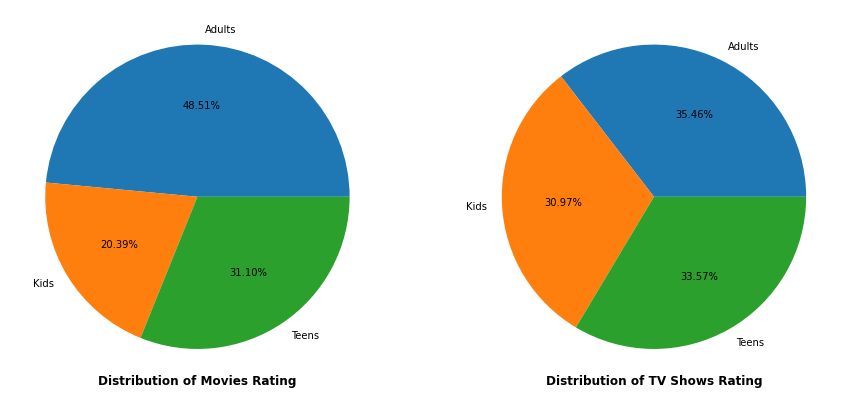

In [545]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,8))

axes[0].pie(x=movie_rating['count'], labels=movie_rating['ages'], autopct='%1.2f%%')
axes[0].set_title('Distribution of Movies Rating', fontweight="bold", y=-0.01)

axes[1].pie(x=tv_rating['count'], labels=tv_rating['ages'], autopct='%1.2f%%')
axes[1].set_title('Distribution of TV Shows Rating', fontweight="bold", y=-0.01)

##### * There are more movies than TV shows added for adults and teens.
##### * More of TV shows are added for kids than movies.

### 

#### 4. Audience Groups and Duration
##### Notice: 
1. All movies have duration in minutes 
2. All TV shows have duration in season(s)

In [546]:
duration_movie = nf[nf['duration'] != 0]
duration_movie.head(2)

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,Season,ages
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",TV-PG,90,"Children & Family Movies, Comedies",2019.0,2019,0,Kids
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,TV-MA,94,Stand-Up Comedy,2016.0,2016,0,Adults


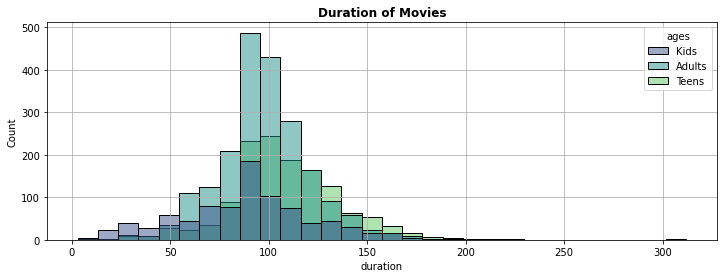

In [547]:
plt.figure(figsize=(12,4))
plt.grid('whitegrid')
sns.histplot(x='duration', data=duration_movie, bins=30, hue='ages', palette="viridis")
plt.title('Duration of Movies',fontweight="bold")
plt.show()

##### * Most of movies are in range from 80 min to 2 hours. These movies are mostly for adults.
##### * Longer movies are made for teenagers and kids.

In [548]:
duration_tv = nf[nf['Season'] != 0]
duration_tv.head(2)

,show_id,type,title,country,rating,duration,listed_in,year_added,year_release,Season,ages
2,70234439,TV Show,Transformers Prime,United States,TV-Y7-FV,0,Kids' TV,2018.0,2013,1,Kids
3,80058654,TV Show,Transformers: Robots in Disguise,United States,TV-Y7,0,Kids' TV,2018.0,2016,1,Kids


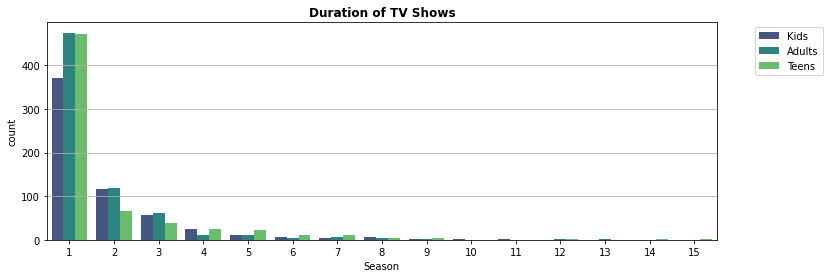

In [549]:
plt.figure(figsize=(12,4))
plt.grid('whitegrid')
sns.countplot(x='Season', data=duration_tv, hue='ages', palette="viridis")
plt.title('Duration of TV Shows',fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### * Most of TV shows have 1 season. The amount decreases in longer seasons (from 8 to 15).
##### * The distribution of length of TV shows is approximatly equal among 3 audience groups.

### 

#### 5. Genres

In [550]:
from sklearn.preprocessing import MultiLabelBinarizer

In [551]:
mlb = MultiLabelBinarizer()

In [552]:
def relation_heatmap(nf, title):
    nf['genre'] = nf['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    
    Types = []
    for i in nf['genre']:
        Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title)) 
    
    res = pd.DataFrame(mlb.fit_transform(nf['genre']), columns=mlb.classes_, index=nf['genre'].index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    plt.title(title+" Genre", fontweight='bold')
    plt.show()

<ipython-input-552-edc1da9a7e05>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


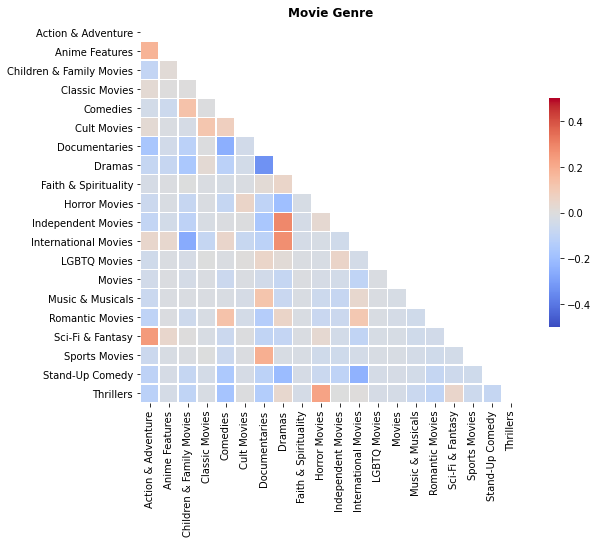

In [553]:
relation_heatmap(nf_movie, 'Movie')

##### * There is negative relationship between drama and documentary.
##### * There are many dramas for independent and international films, and also many Sci-Fi & Fantasy movies for Action & Adventure.

<ipython-input-552-edc1da9a7e05>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 22 types in the Netflix TV Show Dataset


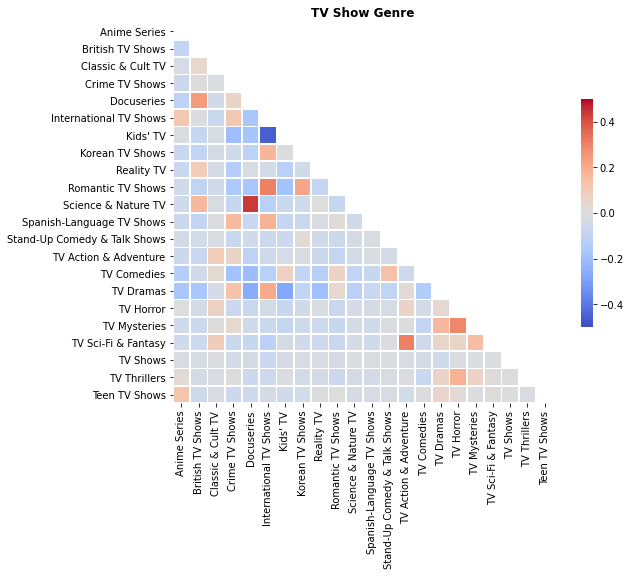

In [554]:
relation_heatmap(nf_tv, 'TV Show')

##### * Negative relationship between Kids' TV and International TV shows, but good amount of International TV shows are Romatic TV shows
##### * There are many Documentaries for Science and Nature TV.
##### * There's positive correlation between TV Horror and TV Mysteries

In [555]:
# plt.figure(figsize=(12,5))
# sns.barplot(x = nf_movie["listed_in"].value_counts().head(10).index,
#             y = nf_movie["listed_in"].value_counts().head(10).values,palette="RdGy")
# plt.xticks(rotation=80)
# plt.title("Top10 Genre in Movies",fontweight="bold")
# plt.show()

In [556]:
# plt.figure(figsize=(12,5))
# sns.barplot(x = nf_tv["listed_in"].value_counts().head(10).index,
#             y = nf_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
# plt.xticks(rotation=80)
# plt.title("Top10 Genre in TV Shows",fontweight="bold")
# plt.show()

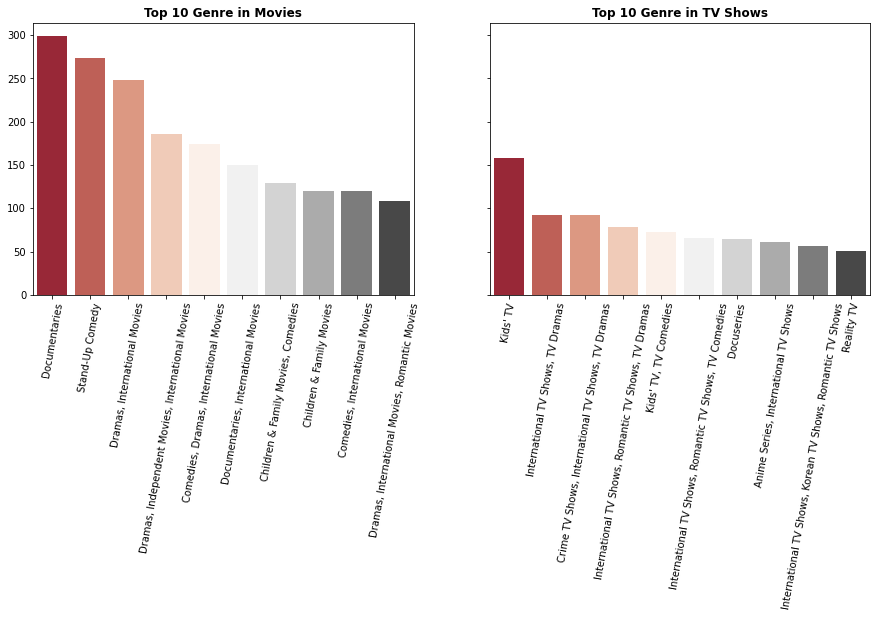

In [557]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#10 Movie Genres
sns.barplot(ax=axes[0], 
            x = nf_movie["listed_in"].value_counts().head(10).index,
            y = nf_movie["listed_in"].value_counts().head(10).values,palette="RdGy")
axes[0].set_title("Top 10 Genre in Movies", fontweight='bold')

#10 TV Show Genres
sns.barplot(ax=axes[1], 
            x = nf_tv["listed_in"].value_counts().head(10).index,
            y = nf_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
axes[1].set_title("Top 10 Genre in TV Shows", fontweight='bold')

#Rotate text in x-axis for better look
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=80)
    
plt.show()

In [558]:
nf.columns

Index(['show_id', 'type', 'title', 'country', 'rating', 'duration',
       'listed_in', 'year_added', 'year_release', 'Season', 'ages'],
      dtype='object')